# 1 t-SNE

t-SNE是一种广泛使用的非线性降维方法，特别适用于高维数据的可视化，通过保留局部结果并尽量减少不同数据点之间的相对距离，从而将数据嵌入到低维空间，使得相似的数据点在低维空间也尽量接近，便于直观理解高维数据的分布模式

## 1.1 t-SNE的原理

核心思想是保留数据局部领域结构，保证相似的数据点在低维空间也尽量靠近，同时尽量拉开不相似的点，包括以下步骤：

1. 计算相似度（高维空间）
    - 对于数据集中的每一对数据点，首先计算它们在高维空间的相似度，这个相似度由高斯分布来衡量
2. 计算低维空间的相似度（低维空间）
    - 通过设置随机的低维初始化点，计算每一对点在低维空间中的相似度买这个相似度由学生t分布来衡量，其与高维空间的高斯分布相似，但更注重稀疏区域的扩展，使得不同类的点在低维空间中的距离拉得更远
3. 优化目标（最小化KL散度）
    - 通过最小化高维空间相似度分布与低维空间相似度分布之间的KL散度，不断调整低维空间中点的位置，KL散度衡量两个分布之间的差异，通过迭代找到一个低维表示，使得高维和低维空间的相似度尽可能相似


## 1.2 t-SNE核心思想

- 相似度建模：计算高维空间点与点的相似性，尝试在低维保留这些相似性
- 优化目标：最小化KL散度，使得高维中邻近的点在低维空间尽可能保持接近
- 局部结构保留：注重保留点之间的局部关系，而非全局结构


## 1.3 优缺点

优点：

- 适合可视化高维数据
- 局部结构保持良好：保留局部邻域的结构，使得降维后相似的数据点在低维空间通常聚集在一起，对于聚类、异常检测等任务非常有用
- 适应非线性结构：与PCA等线性降维方法不同，t-SNE能够揭示数据的非线性结构，适合处理复杂数据

缺点

- 计算开销大：是一个计算密集型的算法，涉及每一对点的相似度计算，数据点的数量和维度都会影响计算效率，在处理非常大的数据集时计算量急剧增加
- 不可逆降维：是一个非线性降维方法，主要为可视化设计，不是为了数据压缩或数据恢复，无法像PCA那样直接恢复高维度
- 无法保持全局结构：虽然在保留局部结构方面良好，但对数据的全局结构（如大类之间的关系）可能保留得不够好


## 1.4 t-SNE适用场景

- 数据可视化：用于将高维数据如图像文本、基因表达数据降维，便于可视化分析
- 聚类分析：降维后的低维空间中，直观地观察数据的聚类结构，有助于发现数据中的潜在模式
- 异常检测：通过观察降维后的数据点分布，识别那些在低维空间中位于离群区域的数据点


## 1.5 TSNE方法

参数：

- n_components:指定降维后的目标维度，一般为2，3
- perplexity:困惑度
    - 控制每个数据点的邻域大小，影响数据点在降维过程中相互之间的相似度计算
    - 较小的值会使得每个数据点的邻域较小，强调局部结构，而较大的值会让邻域增大，考虑更多的数据点
    - 默认值为0，通常设置5-50之间，较小的perplexity适合较小的数据集，较大值适合大数据集
- random_state:随机数种子
- n-jobs:并行计算的核心数，默认为None不使用并行，如果=-1表示使用所有核心


## 1.6 t-SNE案例

digits数据集，一个经典的手写数字图像识别数据集，任务是根据图像的特征预测图像所代表的数字标签
![](../picture/B-tSNE-1.png)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 需要安装scikit-learn包
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
digits = load_digits()
digits

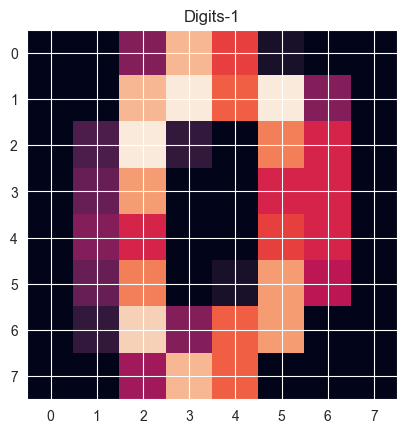

In [2]:
# 绘制数字图像

idx = 0

# 用于二维或三维图像展示，将数组映射到颜色
plt.imshow(digits.images[idx])
plt.title('Digits-1')

# 用于显示已经创建的图像
plt.show()

In [4]:
x = digits.data # 图像的64位向量
y = digits.target # 图像的标签，数字0-9
y.shape

(1797,)

In [5]:

# 使用t-SNE将数据降维到2维

# 初始化降维器，将数据将到2维，设置随机种子
tsne = TSNE(n_components=2,random_state=0)

# 将原始数据X输入tsne中降维，将降维结果返回X_tsne
X_tsne = tsne.fit_transform(x)
X_tsne.shape

(1797, 2)

In [6]:
# 降维后的标签和数据合成一个DF
df_tsne = pd.DataFrame(X_tsne,columns=['c1','c2'])
df_tsne['label'] = y
df_tsne

,c1,c2,label
0,-2.950635,-54.746494,0
1,10.364837,11.905801,1
2,-14.046397,18.980333,2
3,-35.780098,-6.167203,3
4,41.495754,7.378795,4
...,...,...,...
1792,-23.731119,-17.349037,9
1793,3.623522,-49.882515,0
1794,-5.984237,11.164667,8
1795,-21.077692,-15.071691,9


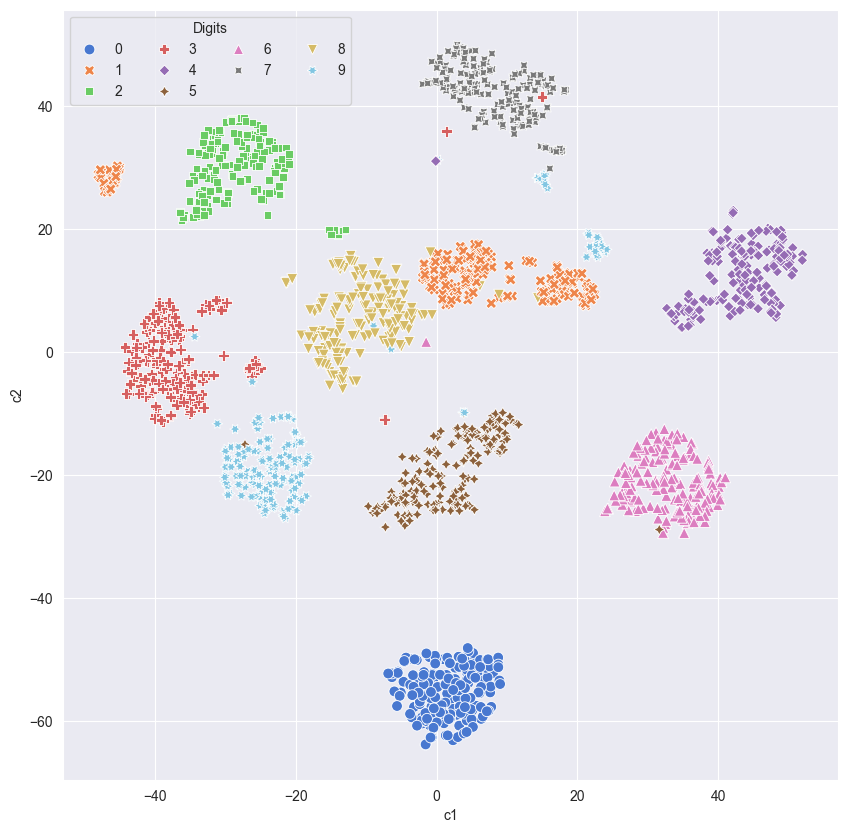

In [9]:
# 使用sns.scatterplot绘制散点图

plt.figure(figsize=(10,10))

sns.scatterplot(data=df_tsne,x='c1',y='c2',hue='label',palette=sns.color_palette("muted"),style='label',s=60)

plt.legend(title='Digits',loc='upper left',ncol=4)
plt.show()